## Different perspective
1. PCA
2. manual
   - encode trustLevel
   - delete 'valuePerSecond', 'scannedLineItemsPerSecond', 'lineItemVoidsPerPosition'
   - generate no. item = totalScanTimeInSeconds * scannedLineItemsPerSecond
3. automatic generation

## Code for test
prepare different input dataset and test at 10-fold stratified cross validation set
1. train_data (raw data)
2. X_train_norm_enc data (normalized and encode)
3. X_train_manual (manual)
4. X_train_PCA (PCA)

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
from classifiers import *
from sklearn.metrics import confusion_matrix

In [2]:
train_data = pd.read_csv('data/train.csv', sep = '|')
test_data = pd.read_csv('data/test.csv', sep = '|')
print(f'Train set has {train_data.shape[0]} entries and {train_data.shape[1]} features')
print(f'Test set has {test_data.shape[0]} entries and {test_data.shape[1]} features')

y = train_data['fraud']
X = train_data.drop(columns=['fraud']).astype(float)
X_all = X.append(test_data, sort=False)

Train set has 1879 entries and 10 features
Test set has 498121 entries and 9 features


In [3]:
## normalize w/ encode 
X_encode= pd.get_dummies(X_all, columns=['trustLevel'], prefix='trustLevel')
X_norm_encode = pd.DataFrame(MinMaxScaler().fit_transform(X_encode), columns=X_encode.columns, index=X_encode.index)
X_train_norm_enc = X_norm_encode.iloc[:1879,:]
X_test_norm_enc = X_norm_encode.iloc[1879:,:]
print(X_train_norm_enc.shape)

(1879, 14)


/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [4]:
## delete correlate features
X_manual = X_all.assign(no_item = X_all.totalScanTimeInSeconds* X_all.scannedLineItemsPerSecond)
X_manual = X_manual.drop(columns=['valuePerSecond', 'scannedLineItemsPerSecond', 'lineItemVoidsPerPosition'])
X_manual.shape
X_manual_norm = pd.DataFrame(MinMaxScaler().fit_transform(X_manual), columns=X_manual.columns, index=X_manual.index)
X_manual_norm_enc = pd.get_dummies(X_manual_norm, columns=['trustLevel'])
X_train_manual = X_manual_norm_enc.iloc[:1879,:]
X_test_manual = X_manual_norm_enc.iloc[:1879,:]
print(X_train_manual.shape)

(1879, 12)


In [5]:
def code_for_test(X,y):
    """
    test code with 10-fold stratified cross validation
    parameters
    X: trainset features after generation
    y: trainset y label
    """
    evaluate_classification(X, y)

In [6]:
code_for_test(X_train_norm_enc, y)

K Nerest Neighbors: test core = -710 
Linear SVM: test core = -520 
RBF SVM: test core = -610 
Logistic Regression: test core = -630 
Decision Tree: test core = -760 
Neural Net: test core = -505 
Random Forest: test core = -85 
AdaBoost: test core = -55 
XGBoost: test core = -60 


In [7]:
code_for_test(X_train_manual, y)

K Nerest Neighbors: test core = -65 
Linear SVM: test core = -520 
RBF SVM: test core = 225 
Logistic Regression: test core = 205 
Decision Tree: test core = -200 
Neural Net: test core = 200 
Random Forest: test core = 80 
AdaBoost: test core = 135 
XGBoost: test core = 80 


## PCA

In [8]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = 'mle')
X_train_PCA = pca.fit_transform(X_train_manual)

In [9]:
print(X_train_PCA)

[[-0.13098485 -0.18134151 -0.59834553 ... -0.35483645  0.04568597
   0.02375872]
 [-0.16179671 -0.51917526  0.66880188 ...  0.08399506 -0.40902145
   0.2969565 ]
 [-0.16594859 -0.60324986  0.65355599 ... -0.09566804  0.28095549
  -0.24742593]
 ...
 [-0.11462781 -0.13732637 -0.25645255 ... -0.54495218 -0.42649373
   0.10559086]
 [ 0.84510662  0.21070022  0.10828317 ... -0.33169038 -0.1483822
  -0.23118448]
 [-0.06397616 -0.15622316 -0.28300791 ... -0.22868086  0.15629087
   0.22400727]]


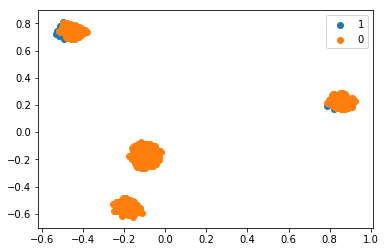

In [10]:
plt.scatter(X_train_PCA[y==1,0], X_train_PCA[y==1,1], label='1')
plt.scatter(X_train_PCA[y==0,0], X_train_PCA[y==0,1], label='0')
plt.legend()

In [11]:
code_for_test(X_train_PCA, y)

K Nerest Neighbors: test core = -65 
Linear SVM: test core = -520 
RBF SVM: test core = 225 
Logistic Regression: test core = 205 
Decision Tree: test core = -75 
Neural Net: test core = 180 
Random Forest: test core = -10 
AdaBoost: test core = 190 
XGBoost: test core = 80 
